In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREPARATION

In [2]:
with open("player_stats.pkl", "rb") as f:
    total_stats = pickle.load(f)

In [3]:
#tolgo seasons che non ci servono
total_stats=total_stats[total_stats["SEASON_ID"]>2003]
total_stats=total_stats[total_stats["SEASON_ID"]<2022]

In [4]:
#sposto la colonna MVP per prima per comodita 
cols = total_stats.columns.tolist()
cols = cols[-2:] + cols[:-2]
total_stats=total_stats[cols]
total_stats

MVP CONF_RANK PLAYER_ID  SEASON_ID     TEAM_ID  PLAYER_AGE  GP     MIN  \
7     0.0        12       949       2004  1610612737        27.0  53  1955.0   
8     0.0        10       949       2004  1610612757        27.0  32   729.0   
9     0.0        13       949       2005  1610612757        28.0  54  1868.0   
10    0.0         8       949       2006  1610612758        29.0  72  1961.0   
11    0.0        11       949       2007  1610612758        30.0  80  2015.0   
...   ...       ...       ...        ...         ...         ...  ..     ...   
5976  0.0        11   1627826       2018  1610612747        21.0  43   410.0   
5977  0.0        10   1627826       2019  1610612747        22.0  33   516.0   
5978  0.0         8   1627826       2019  1610612746        22.0  26   524.0   
5979  0.0         2   1627826       2020  1610612746        23.0  72  1326.0   
5980  0.0         4   1627826       2021  1610612746        24.0  72  1609.0   

      FGM  FGA  ...  FT_PCT OREB DREB  REB  AST STL  BLK  TOV   PF   PTS  
7     383  790  ...   0.880  141  354  495  127  44   19  131  147  1065  
8     118  264  ...   0.832   48   96  144   47  24   18   53   75   319  
9     337  670  ...   0.866  123  269  392  111  49   26  117  150   909  
10    332  632  ...   0.784  106  251  357  149  48   42  108  227   887  
11    310  654  ...   0.726  122  276  398  109  53   40  116  243   793  
...   ...  ...  ...     ...  ...  ...  ...  ...  ..  ...  ...  ...   ...  
5976   61  122  ...   0.765   45   78  123   25   8   15   26   47   161  
5977  112  193  ...   0.864   54  108  162   25   4   27   33   73   281  
5978  100  186  ...   0.733   61  139  200   38  10   24   37   64   244  
5979  236  385  ...   0.747  197  346  543   82  16   66   61  168   596  
5980  257  394  ...   0.789  189  330  519   90  24   62   81  187   650  

[9737 rows x 26 columns]

In [50]:
total_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 7 to 5980
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MVP         5600 non-null   float64
 1   CONF_RANK   5600 non-null   object 
 2   PLAYER_ID   5600 non-null   object 
 3   SEASON_ID   5600 non-null   int64  
 4   TEAM_ID     5600 non-null   object 
 5   PLAYER_AGE  5600 non-null   float64
 6   GP          5600 non-null   int64  
 7   MIN         5600 non-null   float64
 8   FGM         5600 non-null   int64  
 9   FGA         5600 non-null   int64  
 10  FG_PCT      5600 non-null   float64
 11  FG3M        5600 non-null   int64  
 12  FG3A        5600 non-null   int64  
 13  FG3_PCT     5600 non-null   float64
 14  FTM         5600 non-null   int64  
 15  FTA         5600 non-null   int64  
 16  FT_PCT      5600 non-null   float64
 17  OREB        5600 non-null   int64  
 18  DREB        5600 non-null   int64  
 19  REB         5600 non-null  

In [6]:
pd.set_option("display.max_columns", None)
total_stats.head()

MVP CONF_RANK PLAYER_ID  SEASON_ID     TEAM_ID  PLAYER_AGE  GP     MIN  \
7   0.0        12       949       2004  1610612737        27.0  53  1955.0   
8   0.0        10       949       2004  1610612757        27.0  32   729.0   
9   0.0        13       949       2005  1610612757        28.0  54  1868.0   
10  0.0         8       949       2006  1610612758        29.0  72  1961.0   
11  0.0        11       949       2007  1610612758        30.0  80  2015.0   

    FGM  FGA  FG_PCT FG3M FG3A  FG3_PCT  FTM  FTA  FT_PCT OREB DREB  REB  AST  \
7   383  790   0.485    5   23    0.217  294  334   0.880  141  354  495  127   
8   118  264   0.447    4   11    0.364   79   95   0.832   48   96  144   47   
9   337  670   0.503   15   39    0.385  220  254   0.866  123  269  392  111   
10  332  632   0.525    5   22    0.227  218  278   0.784  106  251  357  149   
11  310  654   0.474    3   20    0.150  170  234   0.726  122  276  398  109   

   STL BLK  TOV   PF   PTS  
7   44  19  131  147  1065  
8   24  18   53   75   319  
9   49  26  117  150   909  
10  48  42  108  227   887  
11  53  40  116  243   793

In [7]:
total_stats["GP"]=total_stats["GP"].astype('int')
total_stats["FGM"]=total_stats["FGM"].astype('int')
total_stats["FGA"]=total_stats["FGA"].astype('int')
total_stats["FG3M"]=total_stats["FG3M"].astype('int')
total_stats["FG3A"]=total_stats["FG3A"].astype('int')
total_stats["FTM"]=total_stats["FTM"].astype('int')
total_stats["FTA"]=total_stats["FTA"].astype('int')
total_stats["OREB"]=total_stats["OREB"].astype('int')
total_stats["DREB"]=total_stats["DREB"].astype('int')
total_stats["REB"]=total_stats["REB"].astype('int')
total_stats["AST"]=total_stats["AST"].astype('int')
total_stats["STL"]=total_stats["STL"].astype('int')
total_stats["BLK"]=total_stats["BLK"].astype('int')
total_stats["TOV"]=total_stats["TOV"].astype('int')
total_stats["PF"]=total_stats["PF"].astype('int')
total_stats["PTS"]=total_stats["PTS"].astype('int')


In [8]:
total_stats.describe()

MVP    SEASON_ID   PLAYER_AGE           GP          MIN  \
count  9737.000000  9737.000000  9737.000000  9737.000000  9737.000000   
mean      0.001849  2012.870083    26.913115    45.684811  1067.408956   
std       0.042958     5.205993     4.220461    26.248324   870.661652   
min       0.000000  2004.000000    18.000000     1.000000     0.000000   
25%       0.000000  2008.000000    24.000000    22.000000   269.000000   
50%       0.000000  2013.000000    26.000000    49.000000   885.000000   
75%       0.000000  2018.000000    30.000000    70.000000  1748.000000   
max       1.000000  2021.000000    44.000000    82.000000  3424.000000   

               FGM         FGA       FG_PCT         FG3M         FG3A  \
count  9737.000000  9737.00000  9737.000000  9737.000000  9737.000000   
mean    167.108452   366.91712     0.434214    34.844921    97.397658   
std     165.457261   353.81879     0.109658    48.061831   126.601858   
min       0.000000     0.00000     0.000000     0.000000     0.000000   
25%      31.000000    74.00000     0.396000     0.000000     3.000000   
50%     115.000000   259.00000     0.438000    11.000000    39.000000   
75%     257.000000   566.00000     0.484000    54.000000   154.000000   
max     978.000000  2173.00000     1.000000   402.000000  1028.000000   

           FG3_PCT          FTM          FTA       FT_PCT         OREB  \
count  9737.000000  9737.000000  9737.000000  9737.000000  9737.000000   
mean      0.248712    79.959844   105.278525     0.691335    47.943001   
std       0.176765    99.464134   125.857353     0.217552    56.834061   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    12.000000    17.000000     0.634000     9.000000   
50%       0.309000    44.000000    60.000000     0.750000    28.000000   
75%       0.368000   110.000000   145.000000     0.820000    64.000000   
max       1.000000   756.000000   916.000000     1.000000   440.000000   

              DREB          REB          AST          STL          BLK  \
count  9737.000000  9737.000000  9737.000000  9737.000000  9737.000000   
mean    140.331211   188.274212    97.805895    33.338913    21.451576   
std     138.008785   188.448067   123.851117    32.311297    30.413335   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      31.000000    42.000000    14.000000     7.000000     3.000000   
50%     103.000000   133.000000    53.000000    24.000000    10.000000   
75%     207.000000   271.000000   130.000000    50.000000    27.000000   
max     894.000000  1247.000000   925.000000   217.000000   285.000000   

               TOV           PF          PTS  
count  9737.000000  9737.000000  9737.000000  
mean     60.746328    91.805382   449.021670  
std      59.602550    70.798644   452.700801  
min       0.000000     0.000000     0.000000  
25%      13.000000    28.000000    83.000000  
50%      43.000000    82.000000   305.000000  
75%      90.000000   144.000000   688.000000  
max     464.000000   332.000000  2832.000000

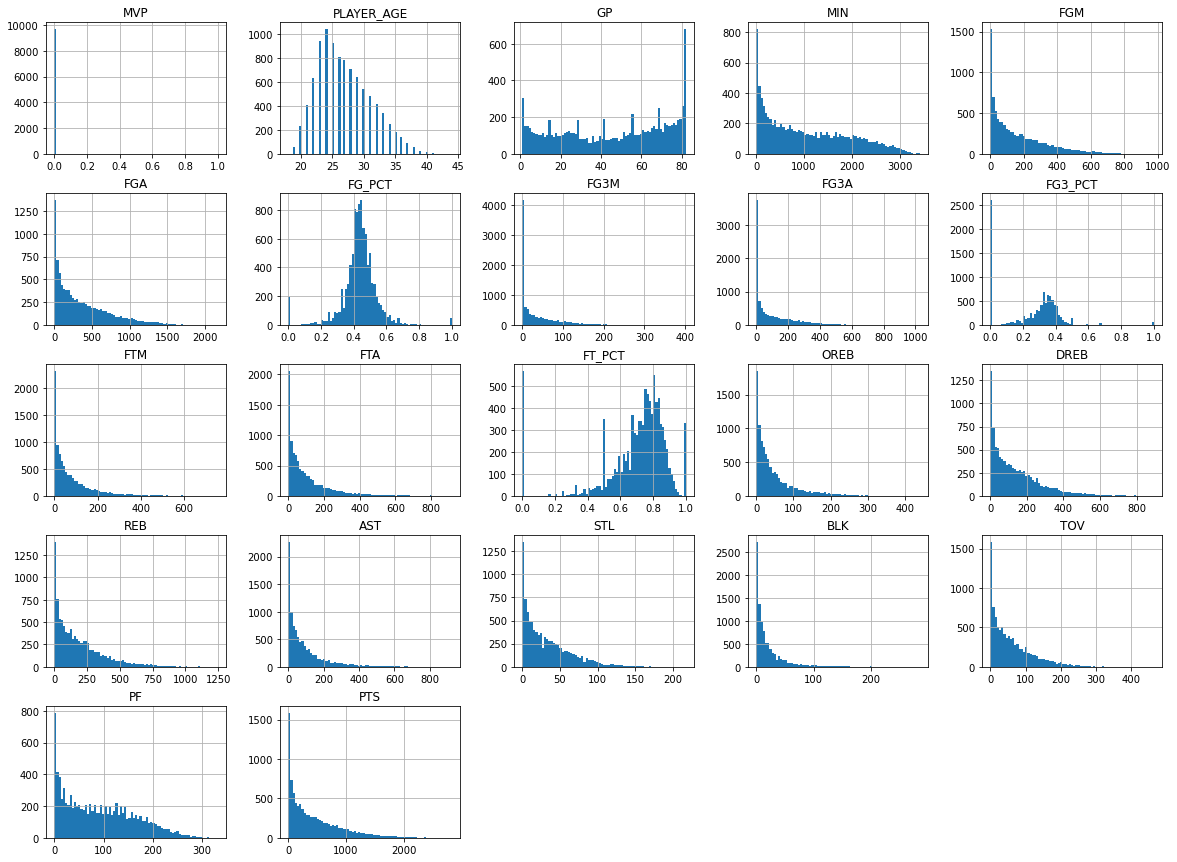

In [9]:
t_hist=total_stats.drop(total_stats.columns[[1,2,3,4]], axis=1)
t_hist.hist(figsize=(20,15),bins=75)
plt.show()

In [10]:
corrmatrix=t_hist.corr()
corrmatrix

MVP  PLAYER_AGE        GP       MIN       FGM       FGA  \
MVP         1.000000    0.000886  0.050070  0.082933  0.141459  0.128439   
PLAYER_AGE  0.000886    1.000000  0.018071  0.032503 -0.005287 -0.001068   
GP          0.050070    0.018071  1.000000  0.879301  0.753847  0.758788   
MIN         0.082933    0.032503  0.879301  1.000000  0.929456  0.933983   
FGM         0.141459   -0.005287  0.753847  0.929456  1.000000  0.989434   
FGA         0.128439   -0.001068  0.758788  0.933983  0.989434  1.000000   
FG_PCT      0.027389   -0.004581  0.286807  0.251253  0.257935  0.200800   
FG3M        0.098192    0.070323  0.518403  0.630494  0.619681  0.680337   
FG3A        0.095521    0.059695  0.536246  0.649293  0.637324  0.703671   
FG3_PCT     0.029070    0.044452  0.215841  0.249924  0.239341  0.278246   
FTM         0.166316   -0.023837  0.616842  0.807088  0.893944  0.886325   
FTA         0.158154   -0.037862  0.634143  0.815698  0.893707  0.877049   
FT_PCT      0.026992    0.091512  0.382794  0.358352  0.333935  0.355880   
OREB        0.042702   -0.038845  0.606241  0.635721  0.600933  0.534550   
DREB        0.108835    0.023720  0.736365  0.840646  0.820197  0.780546   
REB         0.092583    0.005656  0.722108  0.807369  0.781901  0.732843   
AST         0.159780    0.060183  0.582316  0.744505  0.737386  0.762917   
STL         0.102850    0.008091  0.743252  0.870238  0.809785  0.827337   
BLK         0.050697   -0.026024  0.511035  0.544639  0.517802  0.458888   
TOV         0.142472   -0.014334  0.730786  0.889295  0.909564  0.913491   
PF          0.043042   -0.003152  0.879334  0.889080  0.791763  0.778258   
PTS         0.150370   -0.001636  0.741612  0.923678  0.993179  0.990221   

              FG_PCT      FG3M      FG3A   FG3_PCT       FTM       FTA  \
MVP         0.027389  0.098192  0.095521  0.029070  0.166316  0.158154   
PLAYER_AGE -0.004581  0.070323  0.059695  0.044452 -0.023837 -0.037862   
GP          0.286807  0.518403  0.536246  0.215841  0.616842  0.634143   
MIN         0.251253  0.630494  0.649293  0.249924  0.807088  0.815698   
FGM         0.257935  0.619681  0.637324  0.239341  0.893944  0.893707   
FGA         0.200800  0.680337  0.703671  0.278246  0.886325  0.877049   
FG_PCT      1.000000  0.003675 -0.009518  0.026836  0.207242  0.237235   
FG3M        0.003675  1.000000  0.991522  0.482235  0.488710  0.437164   
FG3A       -0.009518  0.991522  1.000000  0.474670  0.513155  0.463419   
FG3_PCT     0.026836  0.482235  0.474670  1.000000  0.165747  0.126045   
FTM         0.207242  0.488710  0.513155  0.165747  1.000000  0.987317   
FTA         0.237235  0.437164  0.463419  0.126045  0.987317  1.000000   
FT_PCT      0.159313  0.345360  0.351511  0.333576  0.302982  0.262158   
OREB        0.372867  0.012049  0.021178 -0.153379  0.527757  0.599990   
DREB        0.324069  0.357503  0.372509  0.067689  0.721708  0.765663   
REB         0.349783  0.265449  0.279192  0.003314  0.687704  0.741680   
AST         0.103168  0.576853  0.603703  0.283787  0.695419  0.673215   
STL         0.175871  0.590005  0.619050  0.261754  0.728234  0.731306   
BLK         0.323896  0.045814  0.053998 -0.113863  0.457936  0.523154   
TOV         0.212706  0.548548  0.577273  0.206946  0.873147  0.879140   
PF          0.315476  0.428789  0.444378  0.105978  0.682907  0.714983   
PTS         0.234469  0.666516  0.683884  0.262568  0.925052  0.916619   

              FT_PCT      OREB      DREB       REB       AST       STL  \
MVP         0.026992  0.042702  0.108835  0.092583  0.159780  0.102850   
PLAYER_AGE  0.091512 -0.038845  0.023720  0.005656  0.060183  0.008091   
GP          0.382794  0.606241  0.736365  0.722108  0.582316  0.743252   
MIN         0.358352  0.635721  0.840646  0.807369  0.744505  0.870238   
FGM         0.333935  0.600933  0.820197  0.781901  0.737386  0.809785   
FGA         0.355880  0.534550  0.780546  0.732843  0.762917  0.827337   
FG_PCT      0.159313  0.372867  0.324069  0.349

In [11]:
corrmatrix["MVP"][np.abs(np.array(corrmatrix["MVP"])).argsort()][::-1]

MVP           1.000000
FTM           0.166316
AST           0.159780
FTA           0.158154
PTS           0.150370
TOV           0.142472
FGM           0.141459
FGA           0.128439
DREB          0.108835
STL           0.102850
FG3M          0.098192
FG3A          0.095521
REB           0.092583
MIN           0.082933
BLK           0.050697
GP            0.050070
PF            0.043042
OREB          0.042702
FG3_PCT       0.029070
FG_PCT        0.027389
FT_PCT        0.026992
PLAYER_AGE    0.000886
Name: MVP, dtype: float64

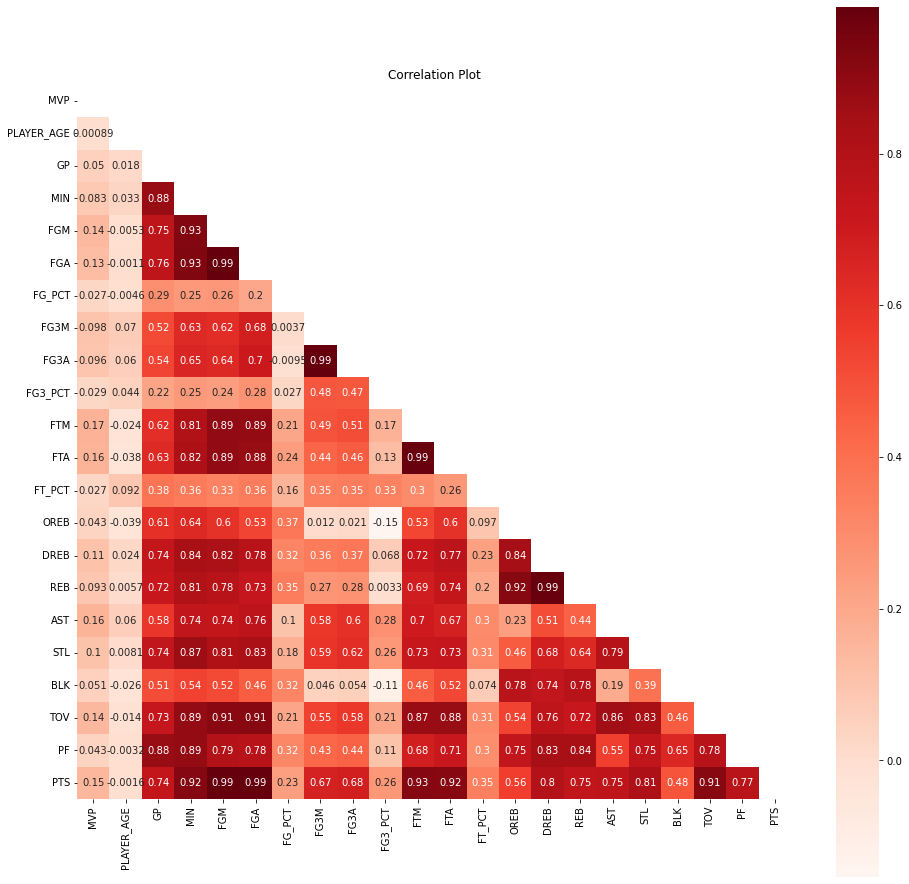

In [12]:
fig, ax =plt.subplots(figsize=(16, 16))
plt.title("Correlation Plot")
sns.heatmap(corrmatrix, mask = np.triu(np.ones_like(corrmatrix, dtype=bool)), cmap=plt.cm.Reds,
            square=True, annot=True, ax=ax)
plt.show()

In [13]:
#How is unbalanced
total_stats["MVP"].value_counts()

0.0    9719
1.0      18
Name: MVP, dtype: int64

In [14]:
total_stats["MVP"].value_counts(normalize=True)

0.0    0.998151
1.0    0.001849
Name: MVP, dtype: float64

/opt/anaconda3/envs/NBA/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


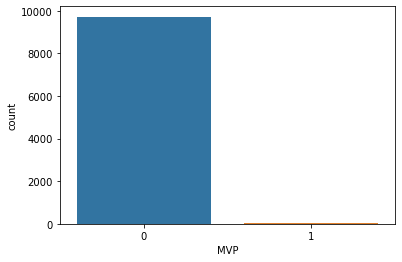

In [15]:
g = sns.countplot(total_stats['MVP'])
g.set_xticklabels(['0','1'])
plt.show()

(array([1195.,  784.,  885.,  743.,  625.,  661.,  834.,  948., 1113.,
        1949.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <BarContainer object of 10 artists>)

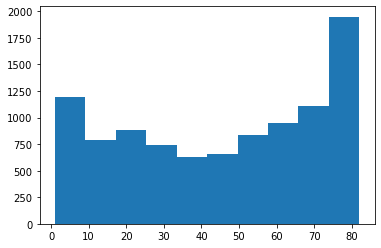

In [16]:
plt.hist(total_stats["GP"])

In [17]:
total_stats=total_stats[total_stats["GP"]>40]

In [18]:
total_stats

MVP CONF_RANK PLAYER_ID  SEASON_ID     TEAM_ID  PLAYER_AGE  GP     MIN  \
7     0.0        12       949       2004  1610612737        27.0  53  1955.0   
9     0.0        13       949       2005  1610612757        28.0  54  1868.0   
10    0.0         8       949       2006  1610612758        29.0  72  1961.0   
11    0.0        11       949       2007  1610612758        30.0  80  2015.0   
13    0.0         6    203518       2017  1610612760        23.0  68  1055.0   
...   ...       ...       ...        ...         ...         ...  ..     ...   
5971  0.0        13   1627835       2018  1610612741        24.0  54   824.0   
5973  0.0        14   1627790       2019  1610612739        22.0  59  1082.0   
5976  0.0        11   1627826       2018  1610612747        21.0  43   410.0   
5979  0.0         2   1627826       2020  1610612746        23.0  72  1326.0   
5980  0.0         4   1627826       2021  1610612746        24.0  72  1609.0   

      FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  \
7     383  790   0.485     5    23    0.217  294  334   0.880   141   354   
9     337  670   0.503    15    39    0.385  220  254   0.866   123   269   
10    332  632   0.525     5    22    0.227  218  278   0.784   106   251   
11    310  654   0.474     3    20    0.150  170  234   0.726   122   276   
13    134  341   0.393    94   247    0.381   44   49   0.898    18    68   
...   ...  ...     ...   ...   ...      ...  ...  ...     ...   ...   ...   
5971   81  234   0.346    37   110    0.336   19   25   0.760    13   118   
5973  183  331   0.553     0     0    0.000   93  132   0.705   108   212   
5976   61  122   0.500     0     1    0.000   39   51   0.765    45    78   
5979  236  385   0.613     0     2    0.000  124  166   0.747   197   346   
5980  257  394   0.652     1     4    0.250  135  171   0.789   189   330   

      REB  AST  STL  BLK  TOV   PF   PTS  
7     495  127   44   19  131  147  1065  
9     392  111   49   26  117  150   909  
10    357  149   48   42  108  227   887  
11    398  109   53   40  116  243   793  
13     86   40   37    8   33  114   406  
...   ...  ...  ...  ...  ...  ...   ...  
5971  131   46   20   15   43   86   218  
5973  320   53   13   22   61  113   459  
5976  123   25    8   15   26   47   161  
5979  543   82   16   66   61  168   596  
5980  519   90   24   62   81  187   650  

[5600 rows x 26 columns]

In [19]:
total_stats["MVP"].value_counts()

0.0    5582
1.0      18
Name: MVP, dtype: int64

In [20]:
total_stats["MVP"].value_counts(normalize=True)

0.0    0.996786
1.0    0.003214
Name: MVP, dtype: float64

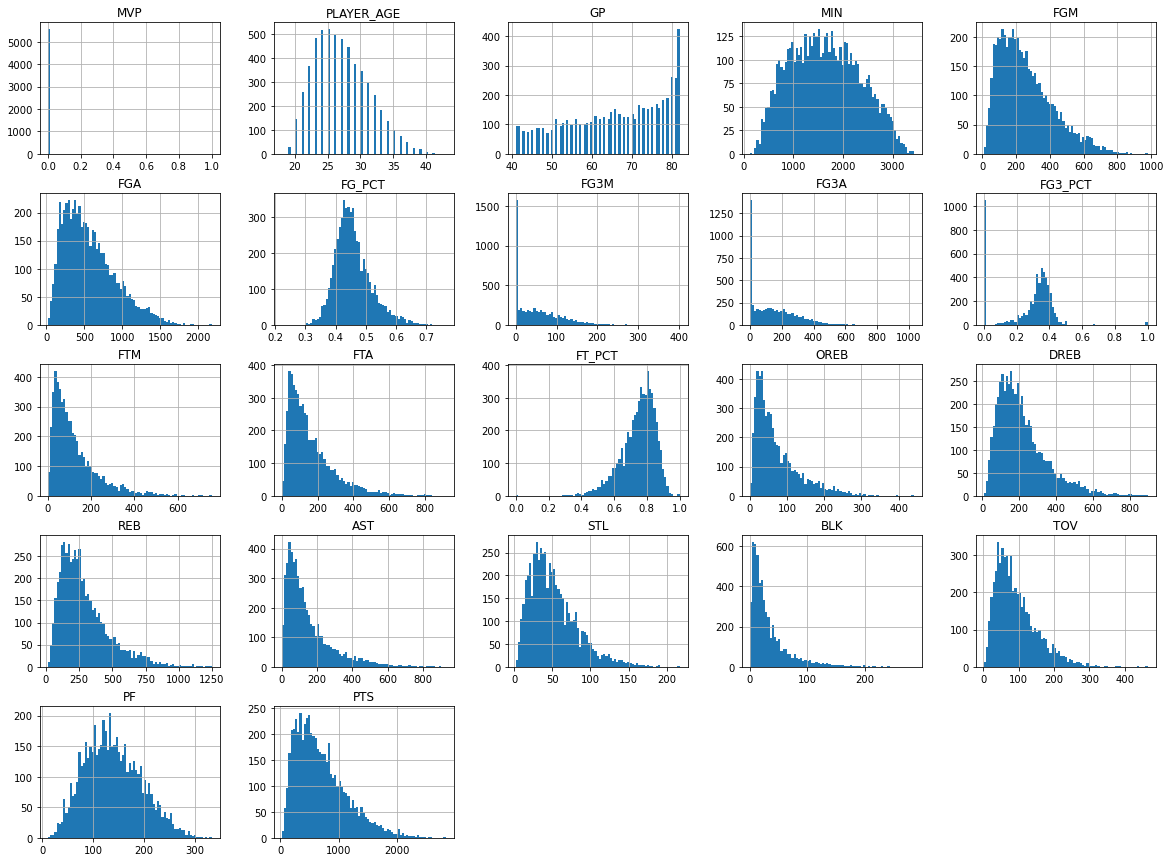

In [21]:
#come cambia la distribuzione dopo aver tolto GP<40
t_hist=total_stats.drop(total_stats.columns[[1,2,3,4]], axis=1)
t_hist.hist(figsize=(20,15),bins=75)
plt.show()

In [22]:
corrmatrix=t_hist.corr()

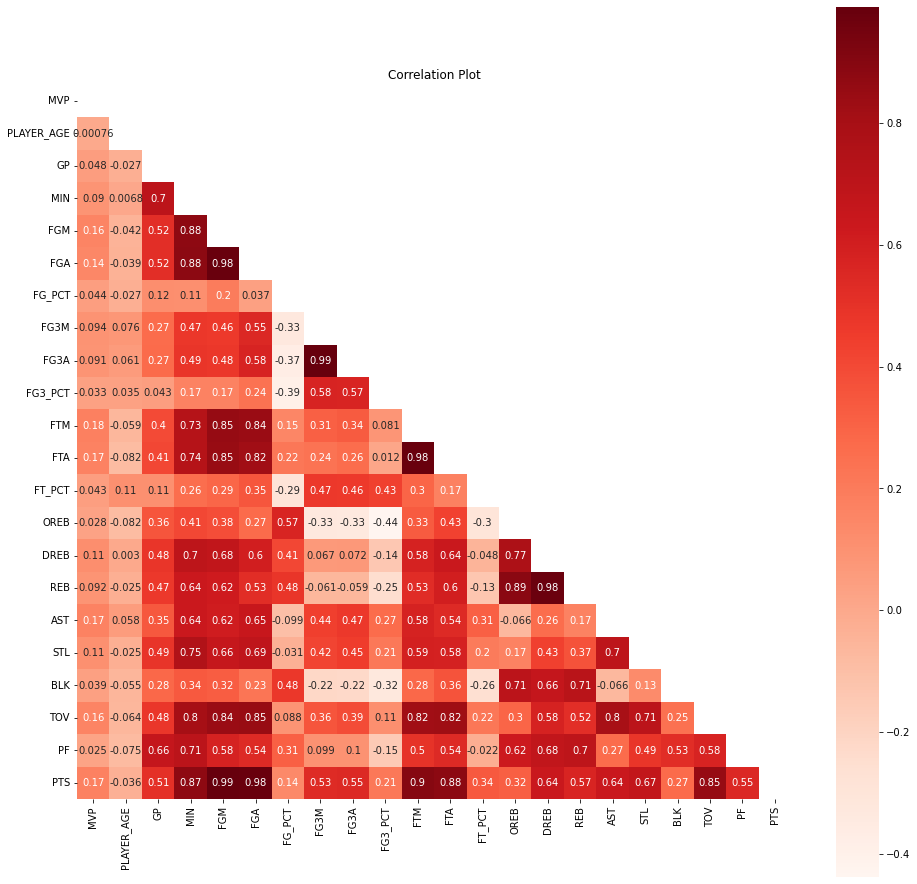

In [23]:
fig, ax =plt.subplots(figsize=(16, 16))
plt.title("Correlation Plot")
sns.heatmap(corrmatrix, mask = np.triu(np.ones_like(corrmatrix, dtype=bool)), cmap=plt.cm.Reds,
            square=True, annot=True, ax=ax)
plt.show()

# PREPROCESSING

In [24]:
#divido il dataset 

In [25]:
season_2021=total_stats[total_stats["SEASON_ID"]==2021]

In [26]:
season_2021

MVP CONF_RANK PLAYER_ID  SEASON_ID     TEAM_ID  PLAYER_AGE  GP     MIN  \
16    0.0         6   1630173       2021  1610612748        21.0  61   737.0   
43    0.0        11    203500       2021  1610612740        27.0  58  1605.0   
48    0.0         6   1628389       2021  1610612748        23.0  64  2143.0   
131   0.0        11   1629638       2021  1610612740        22.0  46  1007.0   
136   0.0         8   1628960       2021  1610612763        25.0  50  1260.0   
...   ...       ...       ...        ...         ...         ...  ..     ...   
5777  0.0        15   1626174       2021  1610612745        25.0  41  1326.0   
5935  0.0        11    201152       2021  1610612741        33.0  68  1652.0   
5939  0.0         5   1629027       2021  1610612737        22.0  63  2125.0   
5949  0.0        10    203469       2021  1610612766        28.0  48  1005.0   
5980  0.0         4   1627826       2021  1610612746        24.0  72  1609.0   

      FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  \
16    124   228   0.544     0     1    0.000   56  110   0.509    73   135   
43    189   308   0.614     0     3    0.000   60  135   0.444   213   301   
48    456   800   0.570     2     8    0.250  283  354   0.799   142   431   
131   192   458   0.419    76   219    0.347   48   66   0.727    13   131   
136   173   414   0.418   107   274    0.391   79   91   0.868    19   141   
...   ...   ...     ...   ...   ...      ...  ...  ...     ...   ...   ...   
5777  329   640   0.514    77   206    0.374  125  198   0.631    76   319   
5935  370   662   0.559    12    45    0.267   71  113   0.628   168   255   
5939  487  1112   0.438   136   397    0.343  484  546   0.886    38   207   
5949  181   324   0.559     4    28    0.143   85  119   0.714   119   209   
5980  257   394   0.652     1     4    0.250  135  171   0.789   189   330   

      REB  AST  STL  BLK  TOV   PF   PTS  
16    208   29   20   28   43   91   304  
43    514  111   54   38   78  113   438  
48    573  346   75   66  169  145  1197  
131   144  102   47   22   69   88   508  
136   160  108   46    8   48   71   532  
...   ...  ...  ...  ...  ...  ...   ...  
5777  395   71   34   48   80   88   860  
5935  423  291   74   40  137  152   823  
5939  245  594   53   12  261  111  1594  
5949  328   86   27   17   51  121   451  
5980  519   90   24   62   81  187   650  

[285 rows x 26 columns]

In [27]:
#creo nuovo dataframe per i modelli
df=total_stats[total_stats["SEASON_ID"]<2021]
df

MVP CONF_RANK PLAYER_ID  SEASON_ID     TEAM_ID  PLAYER_AGE  GP     MIN  \
7     0.0        12       949       2004  1610612737        27.0  53  1955.0   
9     0.0        13       949       2005  1610612757        28.0  54  1868.0   
10    0.0         8       949       2006  1610612758        29.0  72  1961.0   
11    0.0        11       949       2007  1610612758        30.0  80  2015.0   
13    0.0         6    203518       2017  1610612760        23.0  68  1055.0   
...   ...       ...       ...        ...         ...         ...  ..     ...   
5970  0.0         8   1627835       2017  1610612741        23.0  44   843.0   
5971  0.0        13   1627835       2018  1610612741        24.0  54   824.0   
5973  0.0        14   1627790       2019  1610612739        22.0  59  1082.0   
5976  0.0        11   1627826       2018  1610612747        21.0  43   410.0   
5979  0.0         2   1627826       2020  1610612746        23.0  72  1326.0   

      FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  \
7     383  790   0.485     5    23    0.217  294  334   0.880   141   354   
9     337  670   0.503    15    39    0.385  220  254   0.866   123   269   
10    332  632   0.525     5    22    0.227  218  278   0.784   106   251   
11    310  654   0.474     3    20    0.150  170  234   0.726   122   276   
13    134  341   0.393    94   247    0.381   44   49   0.898    18    68   
...   ...  ...     ...   ...   ...      ...  ...  ...     ...   ...   ...   
5970   88  221   0.398    33    99    0.333   31   40   0.775    15   110   
5971   81  234   0.346    37   110    0.336   19   25   0.760    13   118   
5973  183  331   0.553     0     0    0.000   93  132   0.705   108   212   
5976   61  122   0.500     0     1    0.000   39   51   0.765    45    78   
5979  236  385   0.613     0     2    0.000  124  166   0.747   197   346   

      REB  AST  STL  BLK  TOV   PF   PTS  
7     495  127   44   19  131  147  1065  
9     392  111   49   26  117  150   909  
10    357  149   48   42  108  227   887  
11    398  109   53   40  116  243   793  
13     86   40   37    8   33  114   406  
...   ...  ...  ...  ...  ...  ...   ...  
5970  125   36   15   16   40   78   240  
5971  131   46   20   15   43   86   218  
5973  320   53   13   22   61  113   459  
5976  123   25    8   15   26   47   161  
5979  543   82   16   66   61  168   596  

[5315 rows x 26 columns]

In [28]:
#separo labels da features
labels = df['MVP']
features= df.drop('MVP', axis = 1)
features

CONF_RANK PLAYER_ID  SEASON_ID     TEAM_ID  PLAYER_AGE  GP     MIN  FGM  \
7           12       949       2004  1610612737        27.0  53  1955.0  383   
9           13       949       2005  1610612757        28.0  54  1868.0  337   
10           8       949       2006  1610612758        29.0  72  1961.0  332   
11          11       949       2007  1610612758        30.0  80  2015.0  310   
13           6    203518       2017  1610612760        23.0  68  1055.0  134   
...        ...       ...        ...         ...         ...  ..     ...  ...   
5970         8   1627835       2017  1610612741        23.0  44   843.0   88   
5971        13   1627835       2018  1610612741        24.0  54   824.0   81   
5973        14   1627790       2019  1610612739        22.0  59  1082.0  183   
5976        11   1627826       2018  1610612747        21.0  43   410.0   61   
5979         2   1627826       2020  1610612746        23.0  72  1326.0  236   

      FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  \
7     790   0.485     5    23    0.217  294  334   0.880   141   354  495   
9     670   0.503    15    39    0.385  220  254   0.866   123   269  392   
10    632   0.525     5    22    0.227  218  278   0.784   106   251  357   
11    654   0.474     3    20    0.150  170  234   0.726   122   276  398   
13    341   0.393    94   247    0.381   44   49   0.898    18    68   86   
...   ...     ...   ...   ...      ...  ...  ...     ...   ...   ...  ...   
5970  221   0.398    33    99    0.333   31   40   0.775    15   110  125   
5971  234   0.346    37   110    0.336   19   25   0.760    13   118  131   
5973  331   0.553     0     0    0.000   93  132   0.705   108   212  320   
5976  122   0.500     0     1    0.000   39   51   0.765    45    78  123   
5979  385   0.613     0     2    0.000  124  166   0.747   197   346  543   

      AST  STL  BLK  TOV   PF   PTS  
7     127   44   19  131  147  1065  
9     111   49   26  117  150   909  
10    149   48   42  108  227   887  
11    109   53   40  116  243   793  
13     40   37    8   33  114   406  
...   ...  ...  ...  ...  ...   ...  
5970   36   15   16   40   78   240  
5971   46   20   15   43   86   218  
5973   53   13   22   61  113   459  
5976   25    8   15   26   47   161  
5979   82   16   66   61  168   596  

[5315 rows x 25 columns]

In [107]:
#divido train e test --> dobbiamo decidere grandezza test set
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

In [108]:
#standardizzazione i nostri dati per anno
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

num_cols=df.columns
num_cols=num_cols.drop(["MVP",'CONF_RANK', 'PLAYER_ID', 'SEASON_ID', 'TEAM_ID'])
num_cols

train_data=pd.DataFrame()
train_data = pd.concat([train_data, train_features],axis=0,ignore_index=True)

test_data=pd.DataFrame()
test_data = pd.concat([test_data, test_features],axis=0,ignore_index=True)


In [109]:
for year in  train_data["SEASON_ID"].unique().tolist():
    for col in num_cols.tolist():
        train_data.loc[train_data['SEASON_ID']==year, col]=scaler.fit_transform(train_features.loc[train_features['SEASON_ID']==year, col].to_numpy().reshape(-1,1))
                  
        test_data.loc[test_data['SEASON_ID']==year, col]=scaler.transform(test_features.loc[test_features['SEASON_ID']==year, col].to_numpy().reshape(-1,1))
        

In [120]:
train_data

CONF_RANK PLAYER_ID  SEASON_ID     TEAM_ID  PLAYER_AGE        GP  \
0           10    201564       2013  1610612742   -0.496540  1.199290   
1            6      2574       2008  1610612761    0.003063  0.985733   
2           14    201171       2011  1610612758    0.022444 -1.075367   
3           10      2365       2015  1610612748    2.043189 -0.372494   
4            7       970       2006  1610612741    1.239266  0.350888   
...        ...       ...        ...         ...         ...       ...   
4247        12    201567       2012  1610612750   -0.957682 -0.288091   
4248        11      1563       2009  1610612750    2.180144 -1.496141   
4249         9      2590       2013  1610612762    0.714871 -1.645118   
4250         1      1897       2010  1610612747    0.746692  0.707489   
4251        12    203484       2015  1610612765   -1.281024  1.336823   

           MIN       FGM       FGA    FG_PCT      FG3M      FG3A   FG3_PCT  \
0     1.736832  1.260725  1.355585 -0.089658  1.720226  1.524776  0.811265   
1    -0.322664 -0.213254 -0.309183  0.603388  0.112721 -0.149534  1.369023   
2    -0.367534 -0.136313 -0.228135  0.498849 -0.903562 -0.923286 -1.419987   
3    -0.692677 -0.899404 -1.132817  2.163067 -0.952204 -1.007593  0.265267   
4    -1.104292 -0.675173 -0.754962  0.790102 -0.818789 -0.872847 -1.430396   
...        ...       ...       ...       ...       ...       ...       ...   
4247  1.379520  2.016596  2.126653  0.034554  1.620266  1.584693  0.654487   
4248 -1.195469 -1.230987 -1.222527 -0.881412 -0.952639 -1.008976 -1.677100   
4249 -0.311595 -0.196508 -0.109077 -0.415018  0.174034  0.120784  0.674589   
4250  1.167872  0.205121  0.457653 -0.864822  1.156971  1.271179  0.578251   
4251  1.594735  1.075227  1.476954 -0.801514  2.126049  2.339429  0.531660   

           FTM       FTA    FT_PCT      OREB      DREB       REB       AST  \
0     0.677822  0.602640  0.713964 -0.608101  0.334820  0.029007  1.440967   
1    -0.875164 -0.942688  1.087970 -0.778753 -0.936196 -0.929737 -0.638334   
2     0.205638  0.294219 -0.178620  0.726620 -0.647973 -0.210996 -0.669211   
3    -0.368025 -0.273752 -0.679554  0.066238  0.056059  0.061755 -0.815591   
4    -0.485524 -0.394880 -0.982542 -0.432327 -0.833728 -0.745543 -0.737817   
...        ...       ...       ...       ...       ...       ...       ...   
4247  3.308680  3.098913  0.695277  2.829631  3.000783  3.138106 -0.132636   
4248 -0.520884 -0.579901  0.676031 -1.033037 -1.120397 -1.146661 -0.276038   
4249 -0.446220 -0.578189  1.275668 -0.793348 -0.926666 -0.931898  0.913293   
4250 -0.039191  0.081083 -0.416829  0.302377  0.047648  0.131779  0.535826   
4251  0.028354  0.129855 -0.419122 -0.393641 -0.049952 -0.170005 -0.257623   

           STL       BLK       TOV        PF       PTS  
0     1.228266 -0.313884  1.876196  1.149004  1.295004  
1    -0.624750 -0.811103 -0.698497 -0.356411 -0.361992  
2    -0.644638 -0.397552 -0.216305 -0.303334 -0.142241  
3    -0.774734  0.831067 -0.915323 -0.853673 -0.883944  
4    -1.295876 -0.550694 -0.594142 -0.472181 -0.686942  
...        ...       ...       ...       ...       ...  
4247  0.052206 -0.072482  0.964024  0.993551  2.477732  
4248 -1.129514 -0.813555 -1.086845 -1.193694 -1.119941  
4249 -0.189608 -0.690341  0.474988 -0.481507 -0.228064  
4250  1.693336 -0.406375  0.406321  0.282730  0.270553  
4251  1.425797 -0.406297  0.116805  0.570239  1.090893  

[4252 rows x 25 columns]

In [114]:
train_l=pd.DataFrame()
train_l = pd.concat([train_l, train_labels],axis=0,ignore_index=True)
train_l

0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
4247  0.0
4248  0.0
4249  0.0
4250  0.0
4251  0.0

[4252 rows x 1 columns]

season_2021 contiene i dati del 2021. 
df contiene i dati fino al 2020. 
train_features e test_features contengono i dati non standardizzati. 
train_data e test_data contengono i dati standardizzati. 
train_labels e test_labels contengo gli MVP. 

In [113]:
#correlation matrix solo del training e tolgo quelle piu correlate 
train=pd.DataFrame()
train = pd.concat([train_l,train_data],axis=1, ignore_index=False)
train


0 CONF_RANK PLAYER_ID  SEASON_ID     TEAM_ID  PLAYER_AGE        GP  \
0     0.0        10    201564       2013  1610612742   -0.496540  1.199290   
1     0.0         6      2574       2008  1610612761    0.003063  0.985733   
2     0.0        14    201171       2011  1610612758    0.022444 -1.075367   
3     0.0        10      2365       2015  1610612748    2.043189 -0.372494   
4     0.0         7       970       2006  1610612741    1.239266  0.350888   
...   ...       ...       ...        ...         ...         ...       ...   
4247  0.0        12    201567       2012  1610612750   -0.957682 -0.288091   
4248  0.0        11      1563       2009  1610612750    2.180144 -1.496141   
4249  0.0         9      2590       2013  1610612762    0.714871 -1.645118   
4250  0.0         1      1897       2010  1610612747    0.746692  0.707489   
4251  0.0        12    203484       2015  1610612765   -1.281024  1.336823   

           MIN       FGM       FGA    FG_PCT      FG3M      FG3A   FG3_PCT  \
0     1.736832  1.260725  1.355585 -0.089658  1.720226  1.524776  0.811265   
1    -0.322664 -0.213254 -0.309183  0.603388  0.112721 -0.149534  1.369023   
2    -0.367534 -0.136313 -0.228135  0.498849 -0.903562 -0.923286 -1.419987   
3    -0.692677 -0.899404 -1.132817  2.163067 -0.952204 -1.007593  0.265267   
4    -1.104292 -0.675173 -0.754962  0.790102 -0.818789 -0.872847 -1.430396   
...        ...       ...       ...       ...       ...       ...       ...   
4247  1.379520  2.016596  2.126653  0.034554  1.620266  1.584693  0.654487   
4248 -1.195469 -1.230987 -1.222527 -0.881412 -0.952639 -1.008976 -1.677100   
4249 -0.311595 -0.196508 -0.109077 -0.415018  0.174034  0.120784  0.674589   
4250  1.167872  0.205121  0.457653 -0.864822  1.156971  1.271179  0.578251   
4251  1.594735  1.075227  1.476954 -0.801514  2.126049  2.339429  0.531660   

           FTM       FTA    FT_PCT      OREB      DREB       REB       AST  \
0     0.677822  0.602640  0.713964 -0.608101  0.334820  0.029007  1.440967   
1    -0.875164 -0.942688  1.087970 -0.778753 -0.936196 -0.929737 -0.638334   
2     0.205638  0.294219 -0.178620  0.726620 -0.647973 -0.210996 -0.669211   
3    -0.368025 -0.273752 -0.679554  0.066238  0.056059  0.061755 -0.815591   
4    -0.485524 -0.394880 -0.982542 -0.432327 -0.833728 -0.745543 -0.737817   
...        ...       ...       ...       ...       ...       ...       ...   
4247  3.308680  3.098913  0.695277  2.829631  3.000783  3.138106 -0.132636   
4248 -0.520884 -0.579901  0.676031 -1.033037 -1.120397 -1.146661 -0.276038   
4249 -0.446220 -0.578189  1.275668 -0.793348 -0.926666 -0.931898  0.913293   
4250 -0.039191  0.081083 -0.416829  0.302377  0.047648  0.131779  0.535826   
4251  0.028354  0.129855 -0.419122 -0.393641 -0.049952 -0.170005 -0.257623   

           STL       BLK       TOV        PF       PTS  
0     1.228266 -0.313884  1.876196  1.149004  1.295004  
1    -0.624750 -0.811103 -0.698497 -0.356411 -0.361992  
2    -0.644638 -0.397552 -0.216305 -0.303334 -0.142241  
3    -0.774734  0.831067 -0.915323 -0.853673 -0.883944  
4    -1.295876 -0.550694 -0.594142 -0.472181 -0.686942  
...        ...       ...       ...       ...       ...  
4247  0.052206 -0.072482  0.964024  0.993551  2.477732  
4248 -1.129514 -0.813555 -1.086845 -1.193694 -1.119941  
4249 -0.189608 -0.690341  0.474988 -0.481507 -0.228064  
4250  1.693336 -0.406375  0.406321  0.282730  0.270553  
4251  1.425797 -0.406297  0.116805  0.570239  1.090893  

[4252 rows x 26 columns]

In [118]:
t_hist_stand=total_stats.drop(total_stats.columns[[1,2,3,4]], axis=1)
corrmatrix=t_hist_stand.corr()

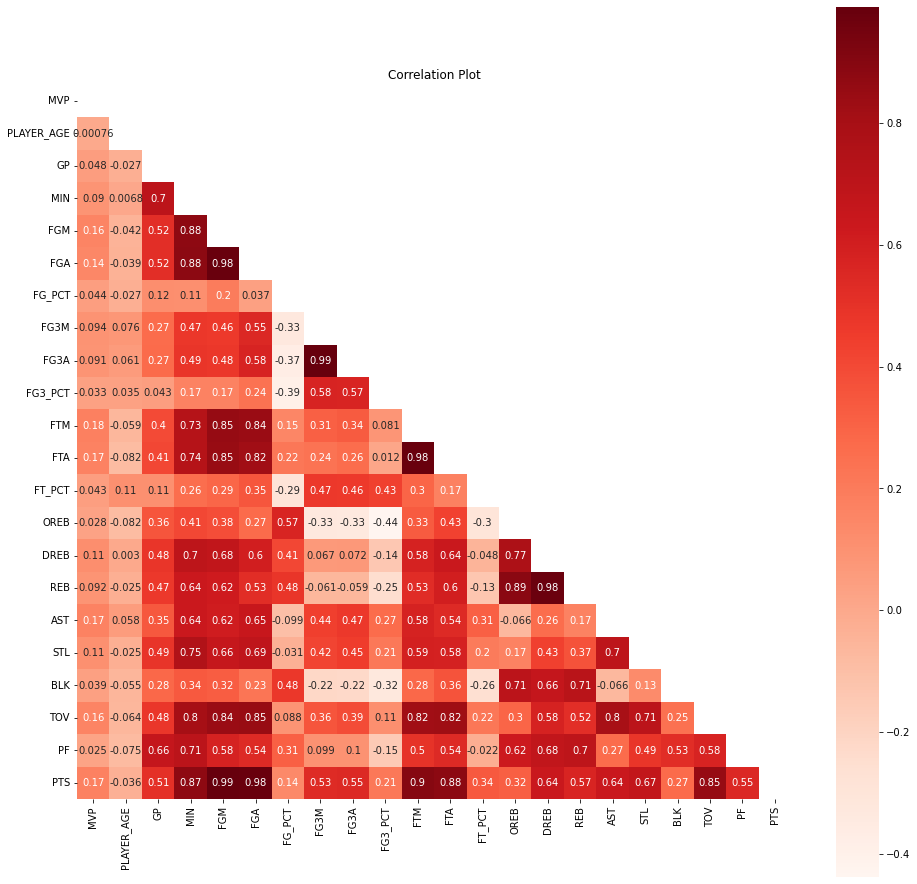

In [119]:
fig, ax =plt.subplots(figsize=(16, 16))
plt.title("Correlation Plot")
sns.heatmap(corrmatrix, mask = np.triu(np.ones_like(corrmatrix, dtype=bool)), cmap=plt.cm.Reds,
            square=True, annot=True, ax=ax)
plt.show()

In [145]:
X_corr = train_data.corr()
corr_names = set()

for i in range(len(X_corr .columns)):
    for j in range(i):
        if abs(X_corr.iloc[i, j]) > 0.9:
            col = X_corr.columns[i]
            corr_names.add(col)
train_data.drop(columns=corr_names,inplace=True)
test_data.drop(columns=corr_names,inplace=True)

In [146]:
train_data

CONF_RANK PLAYER_ID  SEASON_ID     TEAM_ID  PLAYER_AGE        GP  \
0           10    201564       2013  1610612742   -0.496540  1.199290   
1            6      2574       2008  1610612761    0.003063  0.985733   
2           14    201171       2011  1610612758    0.022444 -1.075367   
3           10      2365       2015  1610612748    2.043189 -0.372494   
4            7       970       2006  1610612741    1.239266  0.350888   
...        ...       ...        ...         ...         ...       ...   
4247        12    201567       2012  1610612750   -0.957682 -0.288091   
4248        11      1563       2009  1610612750    2.180144 -1.496141   
4249         9      2590       2013  1610612762    0.714871 -1.645118   
4250         1      1897       2010  1610612747    0.746692  0.707489   
4251        12    203484       2015  1610612765   -1.281024  1.336823   

           MIN    FG_PCT      FG3M   FG3_PCT    FT_PCT      OREB      DREB  \
0     1.736832 -0.089658  1.720226  0.811265  0.713964 -0.608101  0.334820   
1    -0.322664  0.603388  0.112721  1.369023  1.087970 -0.778753 -0.936196   
2    -0.367534  0.498849 -0.903562 -1.419987 -0.178620  0.726620 -0.647973   
3    -0.692677  2.163067 -0.952204  0.265267 -0.679554  0.066238  0.056059   
4    -1.104292  0.790102 -0.818789 -1.430396 -0.982542 -0.432327 -0.833728   
...        ...       ...       ...       ...       ...       ...       ...   
4247  1.379520  0.034554  1.620266  0.654487  0.695277  2.829631  3.000783   
4248 -1.195469 -0.881412 -0.952639 -1.677100  0.676031 -1.033037 -1.120397   
4249 -0.311595 -0.415018  0.174034  0.674589  1.275668 -0.793348 -0.926666   
4250  1.167872 -0.864822  1.156971  0.578251 -0.416829  0.302377  0.047648   
4251  1.594735 -0.801514  2.126049  0.531660 -0.419122 -0.393641 -0.049952   

           AST       STL       BLK        PF  
0     1.440967  1.228266 -0.313884  1.149004  
1    -0.638334 -0.624750 -0.811103 -0.356411  
2    -0.669211 -0.644638 -0.397552 -0.303334  
3    -0.815591 -0.774734  0.831067 -0.853673  
4    -0.737817 -1.295876 -0.550694 -0.472181  
...        ...       ...       ...       ...  
4247 -0.132636  0.052206 -0.072482  0.993551  
4248 -0.276038 -1.129514 -0.813555 -1.193694  
4249  0.913293 -0.189608 -0.690341 -0.481507  
4250  0.535826  1.693336 -0.406375  0.282730  
4251 -0.257623  1.425797 -0.406297  0.570239  

[4252 rows x 17 columns]

# SMOTE

In [ ]:
training_data = total_stats #Mettere solo Train e non test

mvp = training_data["MVP"]
id_player = training_data[["PLAYER_ID", "SEASON_ID", "TEAM_ID", "PLAYER_AGE"]]

perc_data = training_data[["FG_PCT", "FG3_PCT", "FT_PCT"]].astype("float")

data_to_over = pd.concat([training_data.drop(["MVP","PLAYER_ID", "SEASON_ID", "TEAM_ID", "PLAYER_AGE", "FG_PCT", "FG3_PCT", "FT_PCT"], axis=1).astype("int"), perc_data], axis=1)

oversample = SMOTE(sampling_strategy=0.2)
X, y = oversample.fit_resample(data_to_over, mvp)

over_train_data = pd.concat([X, y], axis=1)
over_train_data = over_train_data[["GP", "MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT", "FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV", "PF", "PTS", 'CONF_RANK', "MVP"]]

over_train_data[over_train_data["MVP"]==1]

# LOGISTIC REGRESSSION

In [ ]:
#cross validation con leave one out facendo smote usando solo il train RandomSearchCV

In [7]:
#faccio fit logistic con cross validation
#trovo best_param e best_score

In [ ]:
#fit su train con pramaetri trovati


In [8]:
#predict su test

In [ ]:
#valutazione della prediction

# RANDOM FOREST

# SVM